In [ ]:
import csv 
import pandas as pd
import seaborn as sns 
import plotly.express as px

import plotly.graph_objects as go
import matplotlib.pyplot as plt

#### Ссылка на датасет - [ссылка на kaggle](https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024)

In [ ]:
file_path = 'data/data.csv'
data = pd.read_csv(file_path, delimiter=',')
colors = ['#8FDBD8', '#F775A9', '#F9EDD1', '#B8DEA4', '#10B48E', '#FEAAC2', '#E6E6FA']
# data

/var/folders/m8/xclh77116fv8fn8ck2n6sm1r0000gn/T/ipykernel_96451/3275850542.py:2: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=',')


## Тренды пассажиропотока с течением времени 
Строим график изменения числа пассажиров по годам и кварталам (он интерактивный, можно приближать отдельные промежутки времени). 

Из графика можно сделать вывод о том, что общее число пассажиров, пользующихся услугами авиаперевозок, в среднем растет с течением времени. 
Также можно заметить резкое снижение числа пассажиров начиная с первого квартала 2020 года, что может быть связано с эпидемией короновируса. 

In [3]:
data_passengers = data.groupby(['Year', 'quarter'])['passengers'].sum().reset_index()
data_passengers['Year + quarter'] = data_passengers['Year'].astype(str) + '-Q' + data_passengers['quarter'].astype(str)
layout = go.Layout(paper_bgcolor=colors[-1])
fig = px.line(data_passengers, 
              x='Year + quarter', 
              y='passengers', 
              markers=True,
              title='Число пассажиров по годам и кварталам',
              labels={'passengers': 'Количество пассажиров', 'Year + quarter': 'Год-квартал'}, color_discrete_sequence=colors[1:]
              )
fig.update_layout(xaxis_tickangle=-45)
f = go.Figure(fig, layout=layout)

f.show()

## Анализ цен на билеты в период эпидемии короновируса
Строим график зависимости средней стоимости, минимальной стоимости и средней стоимости билета у крупнейшего перевозчика от времени для самого популярного рейса среди пассажиров в период эпидемии короновируса  

График показывает, что в период пандемии (с конца 2019 года до 2022 года) средняя стоимость билета, цена у крупнейшего перевозчика и минимальная стоимость билета сначала снизились, достигнув минимума в начале 2020 года, а затем постепенно начали восстанавливаться, при этом цены крупнейшего перевозчика восстанавливались быстрее остальных

In [4]:
# Ищем самый популярный среди пассажиров маршрут 

data['route'] = data['airportid_1'].apply(str) +  '_' + data['airportid_2'].apply(str)
the_most = data.groupby(['route'])['passengers'].sum().reset_index().sort_values(by=['passengers'])[-1:]
the_most

,route,passengers
2448,12892_12478,585728


/var/folders/m8/xclh77116fv8fn8ck2n6sm1r0000gn/T/ipykernel_96451/3241703103.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/m8/xclh77116fv8fn8ck2n6sm1r0000gn/T/ipykernel_96451/3241703103.py:10: UserWarning:

The palette list has more values (7) than needed (3), which may not be intended.



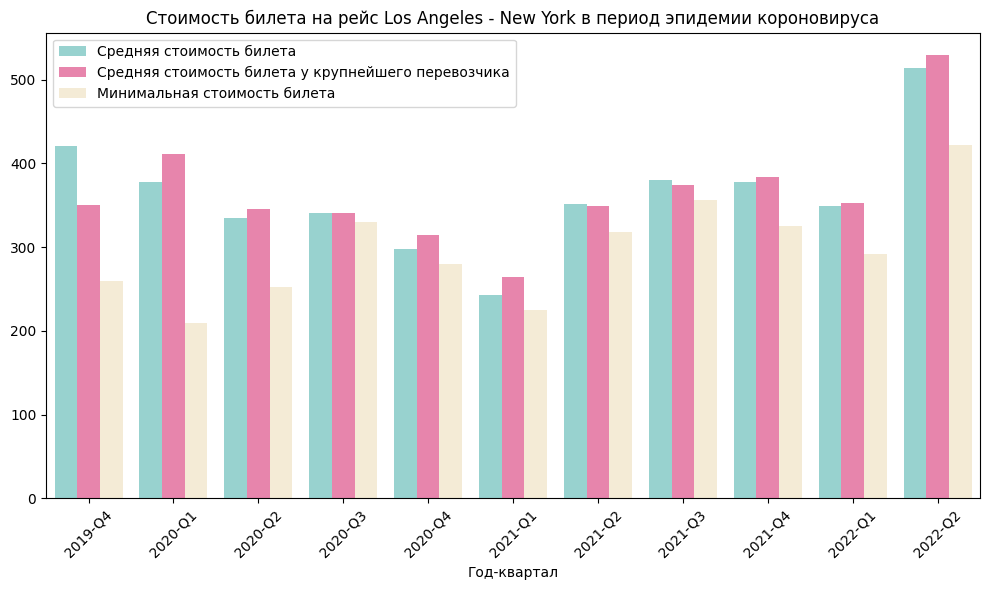

In [5]:
data_covid = data[(((2019 == data.Year) & (data.quarter == 4)) | (data.Year == 2020) | (data.Year == 2021) | ((data.Year == 2022) & (data.quarter <= 2))) & (data.route == '12892_12478')]
data_covid['Year + quarter'] = data_covid.Year.apply(str) + '-Q' + data_covid.quarter.apply(str)
data_covid = data_covid.sort_values(by=['Year + quarter'])
data_covid.rename(columns={'fare': 'Средняя стоимость билета', 'fare_lg': 'Средняя стоимость билета у крупнейшего перевозчика', 'fare_low': 'Минимальная стоимость билета'}, inplace=True)

data_long = pd.melt(data_covid, id_vars=['Year + quarter'], value_vars=['Средняя стоимость билета', 'Средняя стоимость билета у крупнейшего перевозчика', 'Минимальная стоимость билета'], var_name='FareType', value_name='Value')

# Создание бар-графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Year + quarter', y='Value', hue='FareType', data=data_long, palette=colors)

# Настройка заголовков и меток осей
plt.title('Стоимость билета на рейс Los Angeles - New York в период эпидемии короновируса')
plt.xlabel('Год-квартал')
plt.ylabel('')
plt.legend().set_label('')

# Поворот меток оси X для лучшей читабельности
plt.xticks(rotation=45)

# Показ графика
plt.tight_layout()
plt.show()

## Доли рынка крупнейших авииаперевозчиков
По pie chart мы видим, что крупнейшим авиаперевозчиком на рынке является компания "WN", доля рынка которой составляет 26,9%. 

Топ-3 крупнейших авиаперевозчиков - компании "WN", "AA", "DL". Вместе они занимают больше половины всего рынка авиаперевозок.

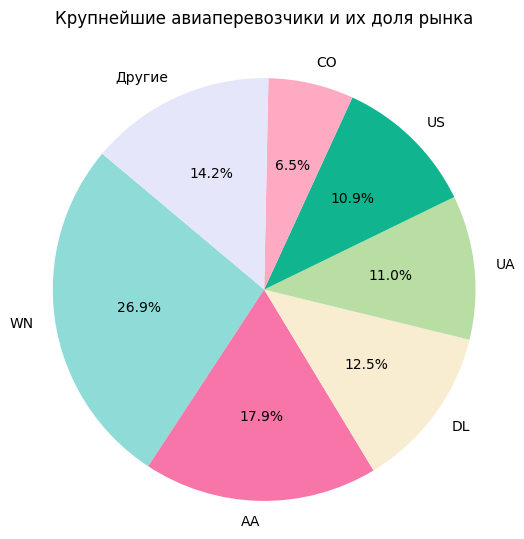

In [6]:
data_market = data.groupby('carrier_lg')['large_ms'].sum().reset_index()
data_market = data_market.sort_values(by='large_ms', ascending=False)
others = data_market['large_ms'][6:].sum()
data_market = data_market.head(6)

labels = data_market['carrier_lg'].tolist() + ['Другие']
sizes = data_market['large_ms'].tolist() + [others]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal') 
plt.title('Крупнейшие авиаперевозчики и их доля рынка', pad=25)
plt.show()